[3.125      3.140625   3.14257812 3.14282227 3.14285278 3.1428566
 3.14285707 3.14285713 3.14285714 3.14285714]
[3.0625     3.06640625 3.06665039 3.06666565 3.0666666  3.06666666
 3.06666667 3.06666667 3.06666667 3.06666667]
[3.03125    3.03222656 3.03225708 3.03225803 3.03225806 3.03225806
 3.03225806 3.03225806 3.03225806 3.03225806]


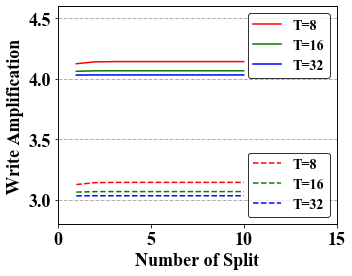

In [39]:
# libraries
import numpy as np
import pandas as pd
import os
import re

from operator import truediv
from matplotlib.pyplot import figure
from matplotlib import gridspec
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.weight'] = 100
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize=(5, 4)) 
gs = gridspec.GridSpec(10, 10) 
gs.update(wspace=5, hspace=0.5) # set the spacing between axes. 
ax1 = plt.subplot(gs[:, 0:])
ax1t=ax1.twinx()

lower = 2.8
upper = 4.6
def PlotLower(ax, T, WAL, WA0, style='b--'):
    t = np.arange(1, 11, 1)
    WA = WA0/np.power(T, t) + (1 + (T-1)*WAL)/T * (1-1/np.power(T, t))/(1-1/T)
    # red dashes, blue squares and green triangles
    ax.plot(t, WA, style)
    ax.yaxis.grid(linewidth=1, linestyle='--')
    ax.xaxis.set_ticks(np.arange(0, 20, 5))
    ax.set_ylim([lower, upper])
    ax.set_xlim([0, 15])
    print(WA)


def PlotUpper(ax, T, WAL, WA0, style='b--'):
    t = np.arange(1, 11, 1)
    WA = WA0/np.power(T, t) + (1 + (T-1)*WAL)/T * (1-1/np.power(T, t))/(1-1/T)
    # red dashes, blue squares and green triangles
    ax.plot(t, WA + 1, style)
    ax.yaxis.grid(linewidth=1, linestyle='--')
    
    ax.xaxis.set_ticks(np.arange(0, 20, 5))
    ax.set_ylim([lower, upper])
    ax.set_xlim([0, 15])
#     print(WA)
    

PlotUpper(ax1t, 8, 3, 3, 'r-')
PlotUpper(ax1t, 16,3, 3, 'g-')
PlotUpper(ax1t, 32,3, 3, 'b-')

PlotLower(ax1, 8, 3, 3, 'r--')
PlotLower(ax1, 16,3, 3, 'g--')
PlotLower(ax1, 32,3, 3, 'b--')

ax1t.legend(["T=8", "T=16", "T=32"], fontsize=14, loc="upper right",edgecolor='k')
ax1.legend(["T=8", "T=16", "T=32"], loc="lower right", fontsize=14, edgecolor='k')
ax1.set_ylabel("Write Amplification", fontsize=18)
ax1.set_xlabel("Number of Split", fontsize=18)
ax1t.set_yticks([])

plt.savefig('math-bound.pdf', bbox_inches='tight')